## 1. Setup

In [1]:
import sys
sys.path.append('../..')

In [2]:
import matplotlib.pyplot as plt
import pandas as pd
import warnings

from experiments.experiment_utils import *

In [3]:
%matplotlib inline
%load_ext autoreload
%autoreload 2

warnings.filterwarnings('ignore')

## 2. ShanghaiTech (Part B)

In [4]:
dataset_name = 'shanghai_tech/part_b'
experiment_name = 'sigma_10_loss_mse_full_img_epochs_50_lr_1e-4'
exp_path = f'./{dataset_name}/{experiment_name}/results/quantitative'

res_list = []
for res_path in sorted(os.listdir(exp_path)):
    csv_path = f'{exp_path}/{res_path}/results.csv'
    print(csv_path)
    res_df = pd.read_csv(csv_path, index_col=[3])
    res_list.append(res_df)

./shanghai_tech/part_b/sigma_10_loss_mse_full_img_epochs_50_lr_1e-4/results/quantitative/epoch_01/results.csv
./shanghai_tech/part_b/sigma_10_loss_mse_full_img_epochs_50_lr_1e-4/results/quantitative/epoch_02/results.csv
./shanghai_tech/part_b/sigma_10_loss_mse_full_img_epochs_50_lr_1e-4/results/quantitative/epoch_03/results.csv
./shanghai_tech/part_b/sigma_10_loss_mse_full_img_epochs_50_lr_1e-4/results/quantitative/epoch_04/results.csv
./shanghai_tech/part_b/sigma_10_loss_mse_full_img_epochs_50_lr_1e-4/results/quantitative/epoch_05/results.csv
./shanghai_tech/part_b/sigma_10_loss_mse_full_img_epochs_50_lr_1e-4/results/quantitative/epoch_06/results.csv
./shanghai_tech/part_b/sigma_10_loss_mse_full_img_epochs_50_lr_1e-4/results/quantitative/epoch_07/results.csv
./shanghai_tech/part_b/sigma_10_loss_mse_full_img_epochs_50_lr_1e-4/results/quantitative/epoch_08/results.csv
./shanghai_tech/part_b/sigma_10_loss_mse_full_img_epochs_50_lr_1e-4/results/quantitative/epoch_09/results.csv
./shanghai

In [5]:
def get_results(res_list, metric='MAE', split='train'):
    r = []
    for res_df in res_list:
        value = res_df[metric][split]
        if metric in ['Underestimate', 'Overestimate', 'Difference']:
            value = float(value.split('%')[0])
        r.append(value)
    
    return r

print(get_results(res_list, metric='MAE', split='train'))
print(get_results(res_list, metric='MAE', split='val'))
print(get_results(res_list, metric='MAE', split='test'))
print(get_results(res_list, metric='Difference', split='test'))

val_mae = get_results(res_list, metric='MAE', split='val')
test_mae = get_results(res_list, metric='MAE', split='test')
best_epoch = np.argmin(val_mae)

print(f'epoch: {best_epoch + 1},  val_mae: {val_mae[best_epoch]}')
print(f'epoch: {best_epoch + 1}, test_mae: {test_mae[best_epoch]}')

[68.321, 50.026, 44.318999999999996, 37.580999999999996, 110.59, 110.84200000000001, 31.074, 52.83, 34.315, 29.238000000000003, 35.853, 28.881999999999998, 31.145, 30.048000000000002, 35.438, 52.202, 25.2, 23.88, 23.754, 53.718999999999994, 22.5, 47.544, 24.473000000000003, 28.736, 20.000999999999998, 16.518, 21.06, 17.064, 35.284, 12.429, 14.883, 12.967, 34.565, 12.889000000000001, 38.104, 9.498, 22.1, 32.446999999999996, 9.917, 13.633, 11.192, 15.123, 14.807, 14.722999999999999, 15.048, 7.837000000000001, 18.662, 15.77, 12.630999999999998, 9.377]
[66.51, 45.247, 45.095, 34.723, 112.516, 112.074, 26.301, 50.251000000000005, 30.372, 24.934, 31.084, 28.351999999999997, 27.433000000000003, 29.798000000000002, 29.519000000000002, 54.751999999999995, 24.081, 23.259, 22.826999999999998, 55.056999999999995, 23.355999999999998, 47.798, 23.914, 26.604, 24.283, 20.643, 25.344, 21.721999999999998, 36.644, 18.017, 20.009, 18.512999999999998, 36.53, 18.465999999999998, 40.243, 16.117, 24.315, 37.9

In [6]:
def plot_results(res_list, metric='', new_figure=True):
    train_res = get_results(res_list, metric=metric, split='train')
    val_res = get_results(res_list, metric=metric, split='val')
    test_res = get_results(res_list, metric=metric, split='test')
    
    if new_figure:
        plt.figure()
    
    plt.title(metric)
    epochs = (1 + np.arange(len(train_res)))
    plt.plot(epochs, train_res, label='train')
    plt.plot(epochs, val_res, label='val')
    plt.plot(epochs, test_res, label='test')
    plt.legend()

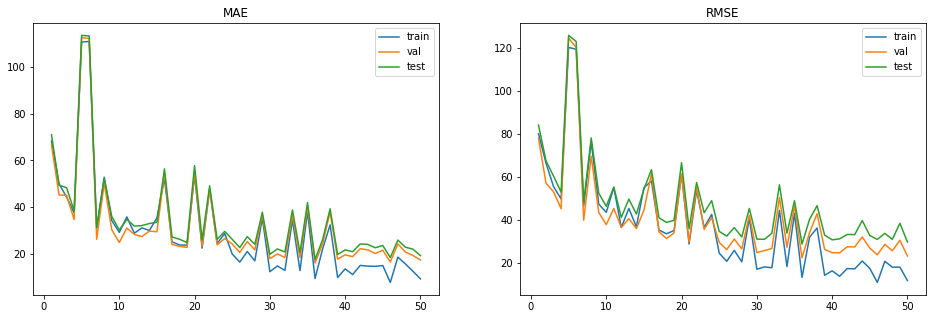

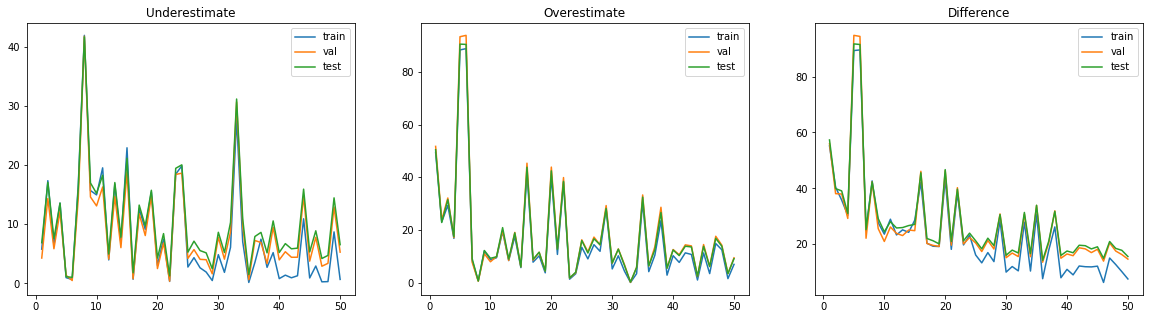

In [7]:
plt.figure(figsize=(16, 5))
plt.subplot(1, 2, 1)
plot_results(res_list, metric='MAE', new_figure=False)
plt.subplot(1, 2, 2)
plot_results(res_list, metric='RMSE', new_figure=False)

plt.figure(figsize=(20, 5))
plt.subplot(1, 3, 1)
plot_results(res_list, metric='Underestimate', new_figure=False)
plt.subplot(1, 3, 2)
plot_results(res_list, metric='Overestimate', new_figure=False)
plt.subplot(1, 3, 3)
plot_results(res_list, metric='Difference', new_figure=False)